## 활용

1. 제품 사진을 찍고 autoEncoder 돌리기
2. X_test의 prediction 값 vs X_test 비교하기
3. 차이가 큰 이미지는 불량일 가능성이 높다

In [1]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense
import os

import numpy as np
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
file_list = os.listdir('C:/Users/user/1.아이리포/이미지 처리/natural_images/person')

In [3]:
file_list[0:10]

['person_0000.jpg',
 'person_0001.jpg',
 'person_0002.jpg',
 'person_0003.jpg',
 'person_0004.jpg',
 'person_0005.jpg',
 'person_0006.jpg',
 'person_0007.jpg',
 'person_0008.jpg',
 'person_0009.jpg']

In [4]:
str(file_list[0])

'person_0000.jpg'

In [5]:
b = []
for i in range(len(file_list)):
#     img=load_img('C:/Users/user/1.아이리포/이미지 처리/natural_images/person/' + str(file_list[i]), target_size=(28,28))
    #타켓사이즈...해상도를 말하는 게 아닐까? 128*128 사이즈로 불러오가
    img=load_img('C:/Users/user/1.아이리포/이미지 처리/natural_images/person/' + str(file_list[i]), target_size=(128,128))

    x=img_to_array(img)
    b.append(x)
    

In [6]:
b[0]

array([[[ 56.,  71., 114.],
        [ 56.,  71., 114.],
        [ 57.,  72., 115.],
        ...,
        [ 56.,  72., 134.],
        [ 57.,  73., 132.],
        [ 57.,  74., 128.]],

       [[ 56.,  71., 114.],
        [ 57.,  72., 115.],
        [ 58.,  71., 115.],
        ...,
        [ 57.,  73., 132.],
        [ 56.,  75., 131.],
        [ 57.,  76., 132.]],

       [[ 57.,  72., 115.],
        [ 58.,  71., 115.],
        [ 58.,  71., 115.],
        ...,
        [ 58.,  75., 129.],
        [ 57.,  76., 132.],
        [ 57.,  76., 132.]],

       ...,

       [[104.,  94.,  82.],
        [ 94.,  82.,  70.],
        [ 82.,  70.,  58.],
        ...,
        [ 89.,  60.,  18.],
        [ 93.,  64.,  22.],
        [105.,  76.,  34.]],

       [[ 96.,  89.,  73.],
        [ 82.,  73.,  58.],
        [ 74.,  65.,  50.],
        ...,
        [ 86.,  54.,  13.],
        [ 91.,  59.,  18.],
        [101.,  69.,  28.]],

       [[ 79.,  72.,  56.],
        [ 64.,  57.,  41.],
        [ 64.,  

In [7]:
x_train = np.array(b) # keras에 적용 가능하도록 array로 바꿈
x_train[0]

array([[[ 56.,  71., 114.],
        [ 56.,  71., 114.],
        [ 57.,  72., 115.],
        ...,
        [ 56.,  72., 134.],
        [ 57.,  73., 132.],
        [ 57.,  74., 128.]],

       [[ 56.,  71., 114.],
        [ 57.,  72., 115.],
        [ 58.,  71., 115.],
        ...,
        [ 57.,  73., 132.],
        [ 56.,  75., 131.],
        [ 57.,  76., 132.]],

       [[ 57.,  72., 115.],
        [ 58.,  71., 115.],
        [ 58.,  71., 115.],
        ...,
        [ 58.,  75., 129.],
        [ 57.,  76., 132.],
        [ 57.,  76., 132.]],

       ...,

       [[104.,  94.,  82.],
        [ 94.,  82.,  70.],
        [ 82.,  70.,  58.],
        ...,
        [ 89.,  60.,  18.],
        [ 93.,  64.,  22.],
        [105.,  76.,  34.]],

       [[ 96.,  89.,  73.],
        [ 82.,  73.,  58.],
        [ 74.,  65.,  50.],
        ...,
        [ 86.,  54.,  13.],
        [ 91.,  59.,  18.],
        [101.,  69.,  28.]],

       [[ 79.,  72.,  56.],
        [ 64.,  57.,  41.],
        [ 64.,  

4차원 데이터 : 마지막 3은 RGB 컬러를 의미함

In [17]:
x_train.shape # 4차원 데이터 : 마지막 3은 RGB 컬러를 의미함

(986, 49152)

In [9]:
type(b), type(x_train)

(list, numpy.ndarray)

In [10]:
len(x_train)

986

In [11]:
x_train = x_train.astype('float32')/255. #이미지를 정규화한다. RGB 최대값이 255
# x_train = np.reshape(x_train, (len(x_train), 2352)) # 딥러닝 모델에 넣기 위해 2차원으로 변환
x_train = np.reshape(x_train, (len(x_train), 49152)) 

In [12]:
x_train.shape

(986, 49152)

In [21]:
model = Sequential()
model.add(Dense(128*2, activation= 'relu', input_dim = 49152)) #여기부터 히든레이어!
model.add(Dense(64*2, activation='relu'))
model.add(Dense(32*2, activation='relu')) #32개 노드로 줄임 - >그만큼 특성이 줄어듦. 이미지복구할 때 제대로 표현하기 힘들 수 있음
#덴스 늘리면 그만큼 fit 속도 느려짐
#그래픽 카드 성능에 따라 속도 !

#중간 값 빼오는 것 : model2 로 응용ㄱㄱ

model.add(Dense(64*2, activation='relu'))
model.add(Dense(128*2, activation='relu'))
model.add(Dense(49152, activation='sigmoid')) 
#활성함수를 뭘 쓰든 상관 없지만, 마지막 Dense에서 sigmoid 쓰면 "맞은 것은 맞다, 아닌것은 아니다"라고 명확하게 표현 할 것 같아서 써봄.
# 뭘 쓰든 상관은 없음. 여러개 돌려보고 결과값이 잘 나오는 걸 쓰면 된다~
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

model.summary() #Total parameters 갯수 알 수 있음. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               12583168  
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_30 (Dense)             (None, 49152)             12632064  
Total params: 25,297,728
Trainable params: 25,297,728
Non-trainable params: 0
________________________________________________________________

In [24]:
model.fit(x_train, x_train, nb_epoch=50, batch_size=128, shuffle=True) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6126
Epoch 2/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6110
Epoch 3/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6101
Epoch 4/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6076
Epoch 5/50
986/986 [==============================] - 7s 7ms/step - loss: 0.6059
Epoch 6/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6055
Epoch 7/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6030
Epoch 8/50
986/986 [==============================] - 6s 6ms/step - loss: 0.6020
Epoch 9/50
986/986 [==============================] - 7s 7ms/step - loss: 0.6012
Epoch 10/50
986/986 [==============================] - 7s 7ms/step - loss: 0.5998
Epoch 11/50
986/986 [==============================] - 7s 7ms/step - loss: 0.5983
Epoch 12/50
986/986 [==============================] - 7s 7ms/step - loss: 0.5973
Epoch 13/50
986/986 [====

KeyboardInterrupt: 

In [ ]:
# model.fit(x_train, x_train, nb_epoch=100, batch_size=16, shuffle=True) 

In [15]:
decoded_imgs = model.predict(x_train)

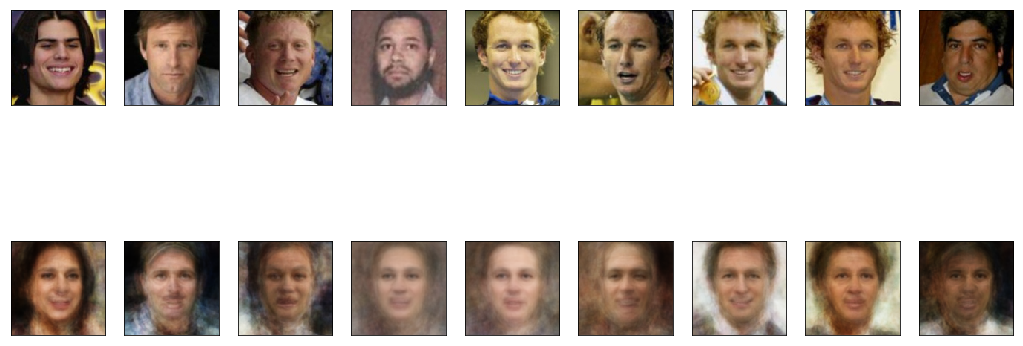

In [16]:
# decoded_imgs = model.predict(x_test_noisy)

n=10
plt.figure(figsize =(20,6))
for i in range(1,n):
    #display original
    ax =plt.subplot(3,n,i) # subplot(nrows, ncols, index, **kwargs)
#     plt.imshow(x_train[i].reshape(28,28,3)) 
    plt.imshow(x_train[i].reshape(128,128,3)) 

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax=plt.subplot(3, n, i+2*n)
#     plt.imshow(decoded_imgs[i].reshape(28,28,3))
    plt.imshow(decoded_imgs[i].reshape(128,128,3))

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()